**Filter Median (Non-Linear Filter)**

---

### 1. Konsep Dasar Filter Median

Filter median adalah filter non-linear yang digunakan untuk mengurangi noise, terutama jenis *salt and pepper noise*, dalam citra digital. Berbeda dengan filter linier yang melakukan operasi matematika berbasis rata-rata atau konvolusi, filter median menggantikan nilai piksel pusat dengan nilai median dari tetangga sekitarnya.

**Langkah-langkah kerja:**
1. Pilih jendela (kernel) persegi, misalnya 3x3 piksel.
2. Ambil semua nilai piksel dalam jendela.
3. Urutkan nilai-nilai tersebut.
4. Ambil nilai median dan jadikan nilai baru piksel pusat.

Keunggulan filter median:
- Lebih efektif daripada mean filter dalam menghilangkan noise impulsif.
- Menjaga batas-batas tepi objek dalam citra.

---



### 2. Contoh Ilustrasi

Misalkan kita memiliki jendela 3x3 dengan nilai berikut:

```
[12, 10, 102]
[8, 255, 9]
[13, 11, 14]
```

- Setelah diurutkan: [8, 9, 10, 11, 12, 13, 14, 102, 255]
- Nilai median = **12** → menggantikan nilai pusat (255)

---


# Import Library dan Load Citra

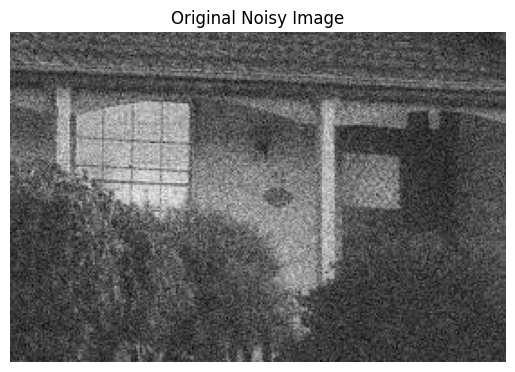

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load gambar dengan noise (grayscale)
img = cv2.imread('/content/images blur.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title("Original Noisy Image")
plt.axis('off')
plt.show()

# Terapkan Filter Median

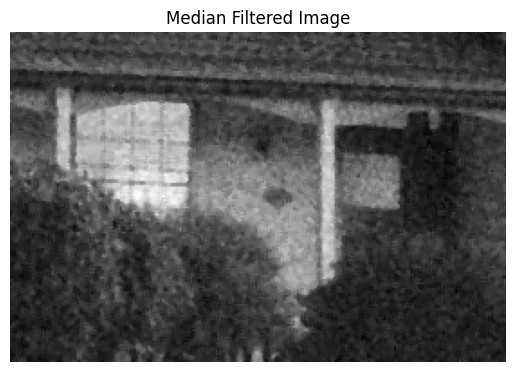

In [ ]:
# Median filter dengan kernel 3x3
median_filtered = cv2.medianBlur(img, 3)

plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()

# Perbandingan dengan Mean Filter

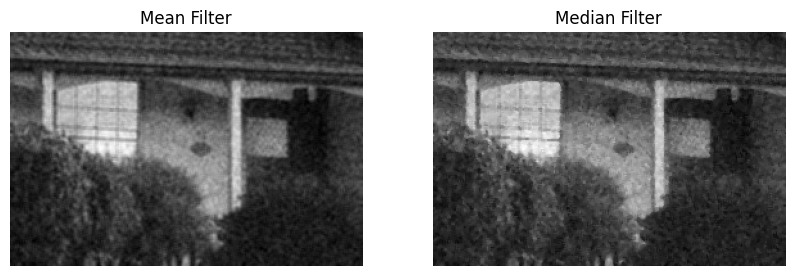

In [ ]:
# Mean filter untuk perbandingan
mean_filtered = cv2.blur(img, (3, 3))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(mean_filtered, cmap='gray')
plt.title("Mean Filter")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(median_filtered, cmap='gray')
plt.title("Median Filter")
plt.axis('off')
plt.show()

# Eksperimen Kernel dan Noise Sintetis

## a. Tambahkan Noise Salt & Pepper ke Citra

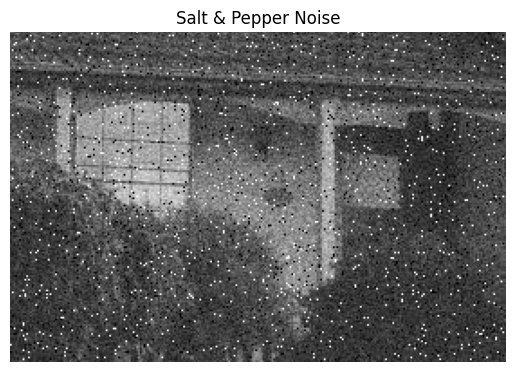

In [ ]:
def add_salt_pepper_noise(image, salt_prob, pepper_prob):
    noisy = image.copy()
    total_pixels = image.size
    salt_count = int(salt_prob * total_pixels)
    pepper_count = int(pepper_prob * total_pixels)

    coords_salt = [np.random.randint(0, i - 1, salt_count) for i in image.shape]
    coords_pepper = [np.random.randint(0, i - 1, pepper_count) for i in image.shape]

    noisy[coords_salt[0], coords_salt[1]] = 255
    noisy[coords_pepper[0], coords_pepper[1]] = 0

    return noisy

noisy_img = add_salt_pepper_noise(img, 0.02, 0.02)
plt.imshow(noisy_img, cmap='gray')
plt.title("Salt & Pepper Noise")
plt.axis('off')
plt.show()

## b. Filter Median dengan Kernel Berbeda

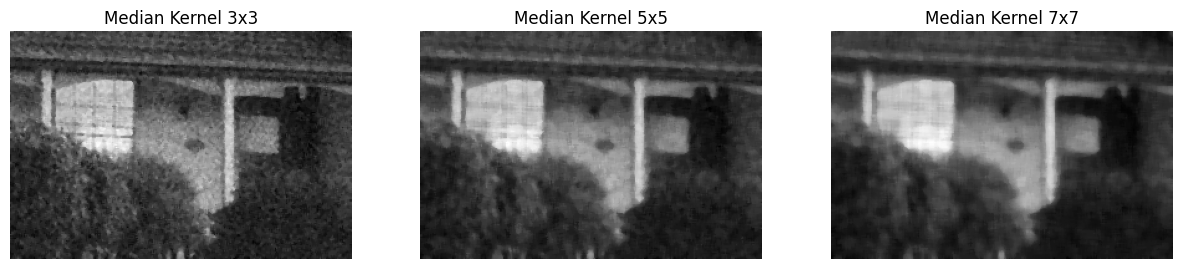

In [ ]:
ksizes = [3, 5, 7]
plt.figure(figsize=(15, 4))
for i, k in enumerate(ksizes):
    filtered = cv2.medianBlur(noisy_img, k)
    plt.subplot(1, len(ksizes), i+1)
    plt.imshow(filtered, cmap='gray')
    plt.title(f"Median Kernel {k}x{k}")
    plt.axis('off')
plt.show()

# Evaluasi Kuantitatif (PSNR)

In [ ]:
def psnr(original, denoised):
    mse = np.mean((original - denoised) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse))

for k in ksizes:
    filtered = cv2.medianBlur(noisy_img, k)
    print(f"PSNR untuk kernel {k}x{k}:", psnr(img, filtered))

PSNR untuk kernel 3x3: 29.563930611315484
PSNR untuk kernel 5x5: 29.153231866940704
PSNR untuk kernel 7x7: 28.997595285228574




# 6. Kesimpulan

- Filter median sangat efektif untuk membersihkan noise tanpa mengaburkan tepi.
- Semakin besar kernel, semakin kuat penghalusan namun dapat mengaburkan detail.
- PSNR dapat digunakan untuk mengukur performa filter terhadap citra asli.
- Noise sintetis seperti salt & pepper membantu dalam pengujian algoritma pemrosesan citra.

